In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [26]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [28]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [48]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the data set is: {recent_date}" )


The most recent date in the data set is: ('2017-08-23',)


The date a year ago from the last date in the data set is: 2016-08-23


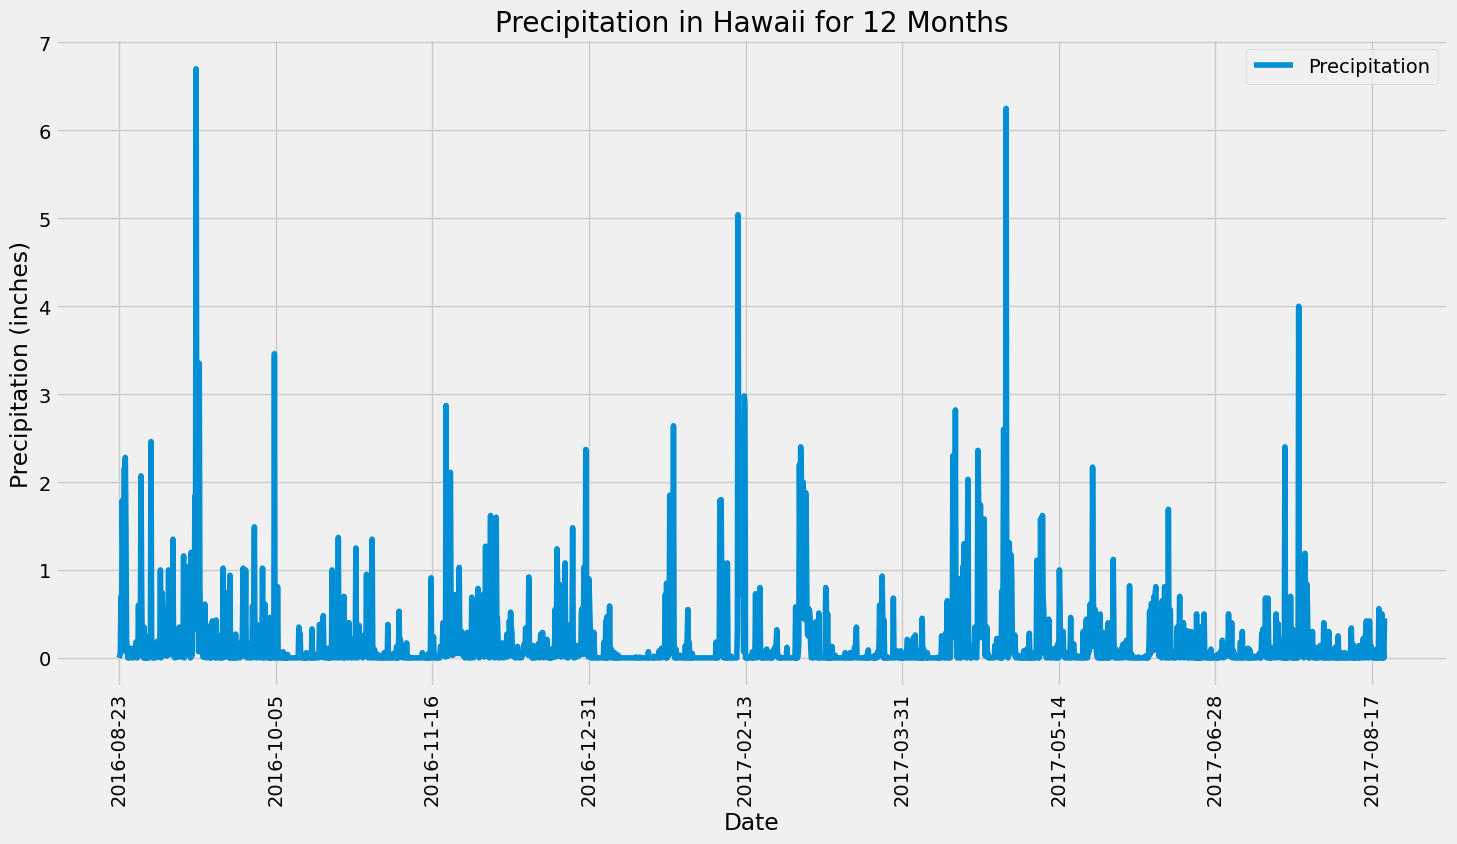

In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"The date a year ago from the last date in the data set is: {year_ago}")


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data = pd.read_sql_query(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).statement, session.bind)
precip_data.set_index('date', inplace=True)
precip_data.dropna(inplace=True)

# Sort the dataframe by date
precip_data.sort_values(by='date', ascending=True, inplace=True)
precip_data

# Use Pandas Plotting with Matplotlib to plot the data
precip_data.plot(figsize=(16,8))
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in Hawaii for 12 Months')
plt.legend(['Precipitation'])
plt.show()

In [50]:
# Use Pandas to calculate the summary statistics for the precipitation data
pre_12_months_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [51]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.id).count()
total_stations

9

In [52]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations[0]

('USC00519281', 2772)

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(f'The lowest tempt is {lowest_temp}, highest is {highest_temp}, and average is {avg_temp}')

The lowest tempt is [(54.0,)], highest is [(85.0,)], and average is [(71.66378066378067,)]


Text(0.5, 0, 'Temperature')

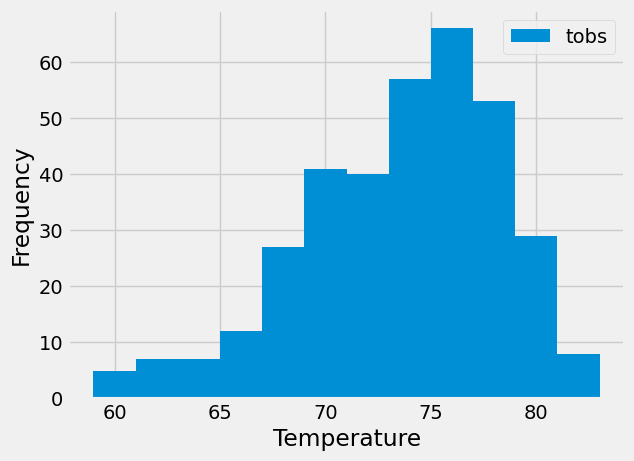

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempt_obs = pd.DataFrame(session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= '2016-08-23').all(), columns=['tobs'])
tempt_obs.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close Session

In [ ]:
# Close Session
session.close()